**Заголовок:** Исследование продаж компьютерных игр

**Описание проекта:** Мы проводим исследование для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования:** Выявить определяющие успешность игры закономерности для возможности прогнозирования будущих продаж.

**Ход исследования:**
* Загрузка и предобработка данных
* Исследовательский анализ данных
* Формирование портрета пользователя по регионам
* Проверка статистических гипотез

**Общий вывод:**
* С 2012 наблюдается стагнация продаж компьютерных игр.
* Среднее время жизни успешных игровых платформ около 10 лет.
* Прибыльными платформами на 2016 год являются: PS4, XOne, PC, 3DS, WiiU.
* Отсутствует корреляция между оценками игроков и объемом продаж игр.
* Имеется слабая корреляция между оценками критиков и объемом продаж игр.
* Самыми прибыльными жанрами являются шутеры, самыми слабыми - пазлы.
* Средние пользователи в Европе и Северной Америке похожи друг на друга, сильно отличаясь при этом от японских игроков.
* Средние пользовательские оценки для XOne и PC равны друг другу.
* Средние пользовательские оценки экшнов выше, чем спортивных игр.


<a class="ancor" id="0-bullet"></a>
## Оглавление

* [Загрузка данных](#1-bullet)
  * [Выводы](#2-bullet)
* [Предобработка данных](#3-bullet)
  * [Стандартизация названий столбцов](#4-bullet)
  * [Приведение типов данных](#5-bullet)
  * [Обработка пропусков](#6-bullet)
  * [Поиск и обработка аномальных значений](#7-bullet)
  * [Категоризация данных](#8-bullet)
  * [Поиск дубликатов](#9-bullet)
  * [Выводы](#10-bullet)
* [Исследовательский анализ данных](#11-bullet)
  * [Выпуск игр по годам](#12-bullet)
  * [Игровые платформы. Общий анализ](#13-bullet)
  * [Определение актуального периода](#14-bullet)
  * [Выбор прибыльных платформ](#15-bullet)
  * [Влияние отзывов](#16-bullet)
  * [Игровые жанры](#17-bullet)
  * [Выводы](#18-bullet)
* [Портрет пользователя по регионам](#19-bullet)
  * [Топ популярных платформ](#20-bullet)
  * [Топ популярных жанров](#21-bullet)
  * [Влияние ESRB](#22-bullet)
  * [Выводы](#23-bullet)
* [Проверка гипотез](#24-bullet)
  * [Равенство рейтингов на плтаформах Xbox One и PC](#25-bullet)
  * [Различие рейтингов игр Action и Sports](#26-bullet)
  * [Выводы](#27-bullet)
* [Общие выводы](#28-bullet)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

<a class="ancor" id="1-bullet"></a>
## Загрузка данных

In [2]:
try:
    df = pd.read_csv("/datasets/games.csv")
except FileNotFoundError:
    df = pd.read_csv("../data/1_5_aggregate_project_games.csv")

In [3]:
df.sample(10, random_state=42)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,Sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN
5500,Etrian Odyssey,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,8.5,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
9489,RollerCoaster Tycoon,XB,2003.0,Strategy,0.10,0.03,0.00,0.00,62.0,8.3,E
12993,Rhapsody: A Musical Adventure,DS,2008.0,Role-Playing,0.05,0.00,0.00,0.00,67.0,6.8,E
12749,Men in Black The Series: Crashdown,PS,2001.0,Shooter,0.03,0.02,0.00,0.00,NaN,NaN,NaN
7270,Samurai Jack: The Amulet of Time,GBA,2003.0,Platform,0.16,0.06,0.00,0.00,63.0,tbd,T
2935,King Kong,2600,1981.0,Action,0.65,0.04,0.00,0.01,NaN,NaN,NaN
8739,Pressure Cooker,2600,1982.0,Action,0.14,0.01,0.00,0.00,NaN,NaN,NaN
2227,Cars,GC,2006.0,Racing,0.72,0.19,0.00,0.03,71.0,7,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a class="ancor" id="2-bullet"></a>
### Выводы

Данные загрузились успешно. Присутствуют пропуски в некоторых столбцах.

[Оглавление](#0-bullet)

<a class="ancor" id="3-bullet"></a>
## Предобработка данных

<a class="ancor" id="4-bullet"></a>
### Стандартизация названий столбцов

Приведём названия столбцов к каноническому виду.

In [5]:
df.columns = df.columns.str.lower()
df.sample(5, random_state=42)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,Sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN
5500,Etrian Odyssey,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,8.5,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
9489,RollerCoaster Tycoon,XB,2003.0,Strategy,0.10,0.03,0.00,0.00,62.0,8.3,E
12993,Rhapsody: A Musical Adventure,DS,2008.0,Role-Playing,0.05,0.00,0.00,0.00,67.0,6.8,E


<a class="ancor" id="5-bullet"></a>
### Приведение типов данных

* Преобразуем год выпуска игры и оценку критиков к целочисленному типу.

In [6]:
df.year_of_release = df.year_of_release.astype("Int64")
df.critic_score = df.critic_score.astype("Int64")
df.sample(5, random_state=42)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3485,London 2012: The Official Video Game of the Ol...,X360,2012,Sports,0.07,0.44,0.00,0.07,<NA>,NaN,NaN
5500,Etrian Odyssey,DS,2007,Role-Playing,0.19,0.02,0.09,0.02,75,8.5,T
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN
9489,RollerCoaster Tycoon,XB,2003,Strategy,0.10,0.03,0.00,0.00,62,8.3,E
12993,Rhapsody: A Musical Adventure,DS,2008,Role-Playing,0.05,0.00,0.00,0.00,67,6.8,E


<a class="ancor" id="6-bullet"></a>
### Обработка пропусков

Вспомним, где имеются пропуски.

In [7]:
(
    df.agg([lambda x: x.isna().sum(), lambda x: round(x.isna().mean() * 100, 1)])
    .set_axis(["na_count", "na_percent"], axis=0)
    .T.sort_values("na_count", ascending=False)
)

,na_count,na_percent
critic_score,8578.0,51.3
rating,6766.0,40.5
user_score,6701.0,40.1
year_of_release,269.0,1.6
name,2.0,0.0
genre,2.0,0.0
platform,0.0,0.0
jp_sales,0.0,0.0
eu_sales,0.0,0.0
na_sales,0.0,0.0


Игр без названия и жанра всего по 2, их точно можно просто удалить.

In [8]:
df.dropna(subset=["name", "genre"], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Игр без года выпуска несколько больше, но для целей анализа год выпуска важен. Возможно год выпуска пропущен для каких-то старых платформ. Посмотрим количество и процент пропусков года выпуска для различных платформ.

In [9]:
df.groupby("platform").agg(
    missing_count=("year_of_release", lambda x: x.isna().sum()),
    missing_percent=("year_of_release", lambda x: round(x.isna().sum() / x.size * 100)),
).query("missing_count > 0").sort_values("missing_percent", ascending=False)

,missing_count,missing_percent
platform,,
2600,17,13
GC,14,3
Wii,34,3
XB,21,3
PS3,25,2
PS2,34,2
PC,17,2
3DS,8,2
X360,30,2


В целом, пропуски в годах выпуска составляют незначительную часть общего количества игр для различных платформ (максимум 13% для платформы 2600).

Так как эта инофрмация важна, но пропусков немного и разумных способов её заполнить нет, то тоже просто удалим такие данные.

In [10]:
df.dropna(subset=["year_of_release"], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропуски в оценках кажется разумным не заполнять.

<a class="ancor" id="7-bullet"></a>
### Поиск и обработка аномальных значений

Проверим на наличие аномальных значений

In [11]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16444.0,16444.000000,16444.000000,16444.000000,16444.000000,7983.0
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.92006
min,1980.0,0.000000,0.000000,0.000000,0.000000,13.0
25%,2003.0,0.000000,0.000000,0.000000,0.000000,60.0
50%,2007.0,0.080000,0.020000,0.000000,0.010000,71.0
75%,2010.0,0.240000,0.110000,0.040000,0.030000,79.0
max,2016.0,41.360000,28.960000,10.220000,10.570000,98.0


Для численных полей всё выглядит разумным.

Посмотрим на пользовательские оценки

In [12]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обращает на себя значение tbd (to be defined). Для нас это эквивалентно пропущенному значению, сделаем эту замену, а заодно приведем оценку на тот же машстаб, что и оценку критиков и преобразуем тип полученного столбца к целочисленному.

In [13]:
df.loc[df["user_score"] == "tbd", "user_score"] = np.nan
df["user_score"] = (pd.to_numeric(df["user_score"]) * 10).astype("Int64")
df["user_score"].describe()

count       7463.0
mean     71.263299
std      14.994467
min            0.0
25%           64.0
50%           75.0
75%           82.0
max           97.0
Name: user_score, dtype: Float64

Посмотрим на рейтинг esrb. 

In [14]:
df["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно информации с [официального сайта](https://www.esrb.org/ratings-guide/) RP (rating pending) означает, что рейтинг еще не присвоен, поэтому все пропуски можно заменить этим значением.

Кроме того, с 2018 года рейтинг EC больше [не существует](https://rating-system.fandom.com/wiki/ESRB_Early_Childhood) и все игры с этим рейтингом были конверитрованы в рейтинг E, сделаем и мы тоже самое. 

In [15]:
df.loc[df["rating"].isna(), "rating"] = "RP"
df.loc[df["rating"] == "EC", "rating"] = "E"
df["rating"].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO'], dtype=object)

<a class="ancor" id="8-bullet"></a>
### Категоризация данных

Добавим категорию общих продаж по всем регионам.

In [16]:
df["total_sales"] = df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)
df[["na_sales", "eu_sales", "jp_sales", "other_sales", "total_sales"]].sample(
    5, random_state=42
)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
14201,0.00,0.00,0.03,0.00,0.03
2435,0.35,0.36,0.00,0.14,0.85
4564,0.33,0.08,0.00,0.01,0.42
7258,0.00,0.00,0.22,0.00,0.22
10988,0.00,0.00,0.09,0.00,0.09


<a class="ancor" id="9-bullet"></a>
### Проверим на наличие дубликатов

In [17]:
df.duplicated().sum()

np.int64(0)

Дубликаты не обнаружены

In [18]:
df[df[["name", "platform", "year_of_release"]].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,55,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,55,E,0.01


Да, действительно есть такие дубликаты. Мне кажется самым разумным сложить для таких дубликатов все продажи.

В данном случае тут всего один такой дубликат, но для его удаления я использую метод, который сработает с любым количством дубликатов. 

In [19]:
df = (
    df.groupby(["name", "platform", "year_of_release"])
    .agg(
        {
            **{
                sales_col: "sum"
                for sales_col in [
                    "na_sales",
                    "eu_sales",
                    "jp_sales",
                    "other_sales",
                    "total_sales",
                ]
            },
            **{
                col: "first"
                for col in ["genre", "critic_score", "user_score", "rating"]
            },
        }
    )
    .reset_index()
)

Проверим, что сработало.

In [20]:
df.query("name == 'Madden NFL 13' and platform == 'PS3'")

,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,genre,critic_score,user_score,rating
7652,Madden NFL 13,PS3,2012,2.11,0.23,0.0,0.23,2.57,Sports,83,55,E


<a class="ancor" id="10-bullet"></a>
### Выводы

Была проведена предобработка данных:
* Названия столбцов данных приведены к каноническому виду.
* Корректировка типов данных:
  * Год выпуска игры и оценка критиков приведены к целочисленному виду
  * Пользовательская оценка приведена к единой шкале с оценкой критиков, её тип также установлен целочисленным.
* Работа с пропусками:
  * Игры без названия, жанра и года выпуска удалены, так как их суммарное значение незначительно (271) и они равномерно распределены по платформам.
  * Пропуски в оценках не заполнялись.
  * Пропуски в рейтинге заменены категорией 'RP' (rating pending).
* Обработка аномальных значений
  * В пользовательских оценках значения 'tbd' заменены пропусками.
* Категоризация
  * В рейтинге ESRB рейтинг 'EC' заменён на рейтинг 'E' в соответствии с процедурой, проведенной самим ESRB. (как было сказано выше, пропускам присвоено значение 'RP')
  * Добавлен столбец с суммарными продажами - 'total_sales'
* * Обнаружен один неявные дубликат. Для этого дубликата продажи просуммированы и дублирующее значение удалено.

[Оглавление](#0-bullet)

<a class="ancor" id="11-bullet"></a>
## Исследовательский анализ данных

<a class="ancor" id="12-bullet"></a>
### Выпуск игр по годам

Посмотрим на общее количество выпускаемых игр по годам

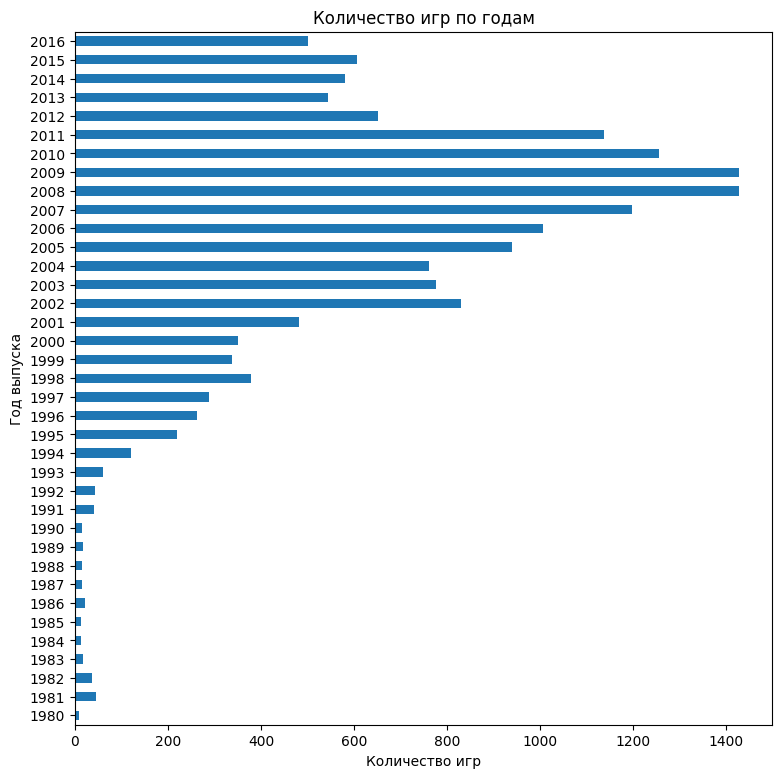

In [21]:
_ = df.pivot_table(
    index="year_of_release",
    aggfunc={
        "name": "count",
    },
).plot(
    kind="barh",
    figsize=(9, 9),
    title="Количество игр по годам",
    ylabel="Год выпуска",
    xlabel="Количество игр",
    legend=False,
)

Активный рост числа выпускаемых игр начался примерно с 1994 года и продолжался до 2008-2009 годов.
Затем за 5 лет произошло резкое (более, чем в 2 раза) сокращение выпуска новых игр до примерно 600 в год и с тех пор это значение оставаётся примерно постоянным.

Интересно, с чем связано резкое падение после 2009 года? В голову приходит экономический кризис 2008 года и рост популярности мобильных игр (в 2007 вышел iPhone, а в 2008 появился andriod), которые могли перетянуть часть аудитории и производителей игр.

<a class="ancor" id="13-bullet"></a>
### Игровые платформы. Общий анализ

Давайте поподробнее посмотрим на то, как менялись продажи игр для различных платформ.

In [22]:
platform_agg = (
    df.groupby("platform")
    .agg(
        appeared=("year_of_release", "min"),
        last_observed=("year_of_release", "max"),
        lasted=("year_of_release", lambda x: x.max() - x.min()),
        tot_games=("name", "count"),
        games_per_year=(
            "year_of_release",
            lambda x: round(x.count() / (x.max() - x.min() + 1)),
        ),
        sales=("total_sales", "sum"),
        sales_per_year=(
            "total_sales",
            lambda x: round(x.sum() / (x.max() - x.min() + 1)),
        ),
        max_sales=("total_sales", "max"),
    )
    .sort_values("sales", ascending=False)
)

platform_agg.head(10)

,appeared,last_observed,lasted,tot_games,games_per_year,sales,sales_per_year,max_sales
platform,,,,,,,,
PS2,2000,2011,11,2127,177,1233.56,57,20.81
X360,2005,2016,11,1232,103,961.24,42,21.82
PS3,2006,2016,10,1305,119,931.34,42,21.05
Wii,2006,2016,10,1286,117,891.18,11,82.54
DS,1985,2013,28,2121,73,802.78,26,29.80
PS,1994,2003,9,1190,119,727.58,61,10.95
PS4,2013,2016,3,392,98,314.14,20,14.63
GBA,2000,2007,7,811,101,312.88,19,15.84
PSP,2004,2015,11,1193,99,289.53,33,7.68


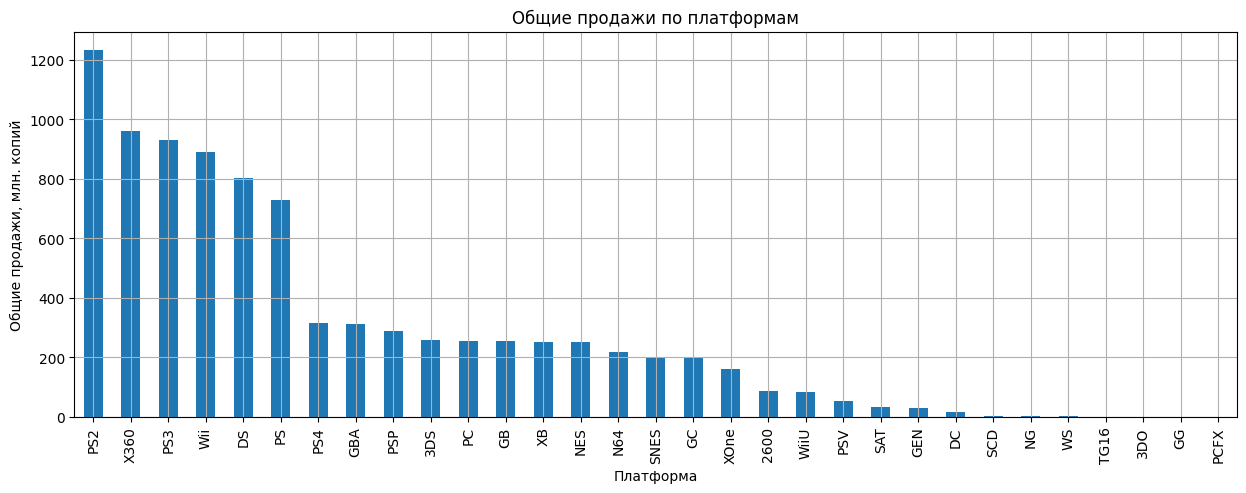

In [23]:
_ = (
    platform_agg["sales"]
    .sort_values(ascending=False)
    .plot.bar(
        figsize=(15, 5),
        title="Общие продажи по платформам",
        xlabel="Платформа",
        ylabel="Общие продажи, млн. копий",
        grid=True,
        legend=False,
    )
)

По общим продажам явно выделяются 6 платформ: PS/PS2/PS3, X360, Wii и DS, за ними идёт группа из 12 платформ с общими продажами около 200-300 млн. копий, все остальные платформы имеют незначительные продажи.

<a class="ancor" id="14-bullet"></a>
### Определение актуального периода

Интересно посмотреть как в исторической перспективе менялись продажи.

Начнём с крупнейших платформ.

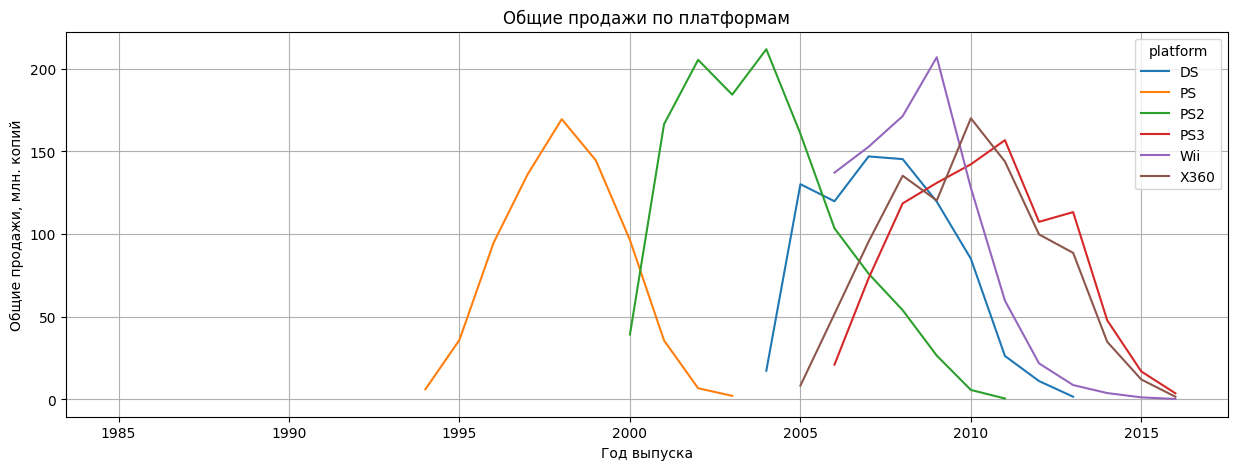

In [24]:
_ = (
    df[df["platform"].isin(platform_agg.nlargest(6, "sales").index)]
    .pivot_table(
        index="year_of_release",
        columns="platform",
        values="total_sales",
        aggfunc="sum",
    )
    .plot(
        kind="line",
        figsize=(15, 5),
        title="Общие продажи по платформам",
        xlabel="Год выпуска",
        ylabel="Общие продажи, млн. копий",
        grid=True,
    )
)

Интересно, что все эти платформы к 2016 году "умерли".

Давайте перестроим графики, чтобы их удобнее было сравнивать друг с другом.

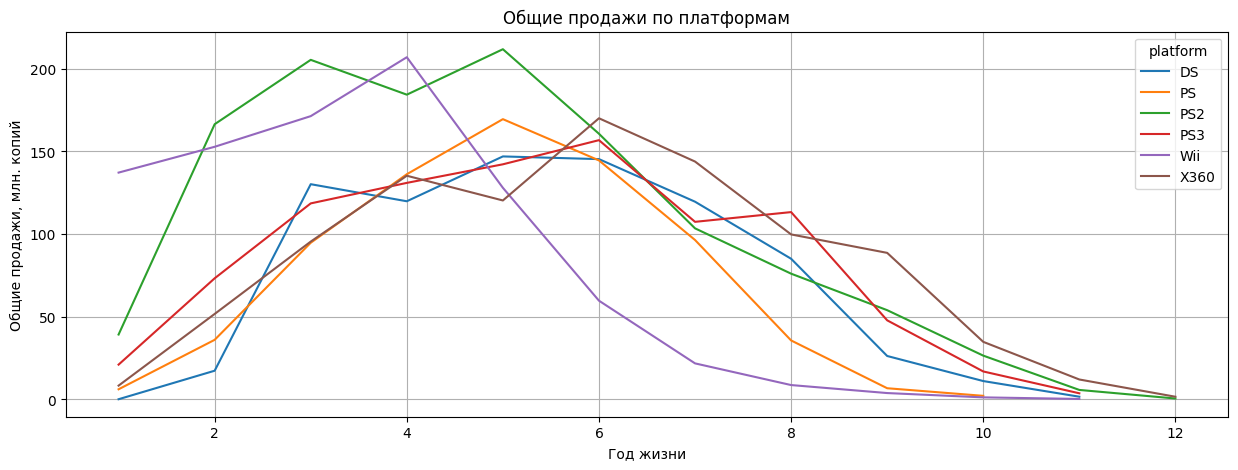

In [25]:
top_platform_life = (
    df[df["platform"].isin(platform_agg.nlargest(6, "sales").index)]
    .pivot_table(
        index="year_of_release",
        columns="platform",
        values="total_sales",
        aggfunc="sum",
    )
    .apply(lambda x: x.dropna(ignore_index=True))
)
top_platform_life.index = top_platform_life.index + 1
_ = top_platform_life.plot(
    kind="line",
    figsize=(15, 5),
    title="Общие продажи по платформам",
    xlabel="Год жизни",
    ylabel="Общие продажи, млн. копий",
    grid=True,
)

В целом, жизненный цикл всех успешных платформ похож и можно рассмотреть его усреднённые значения.

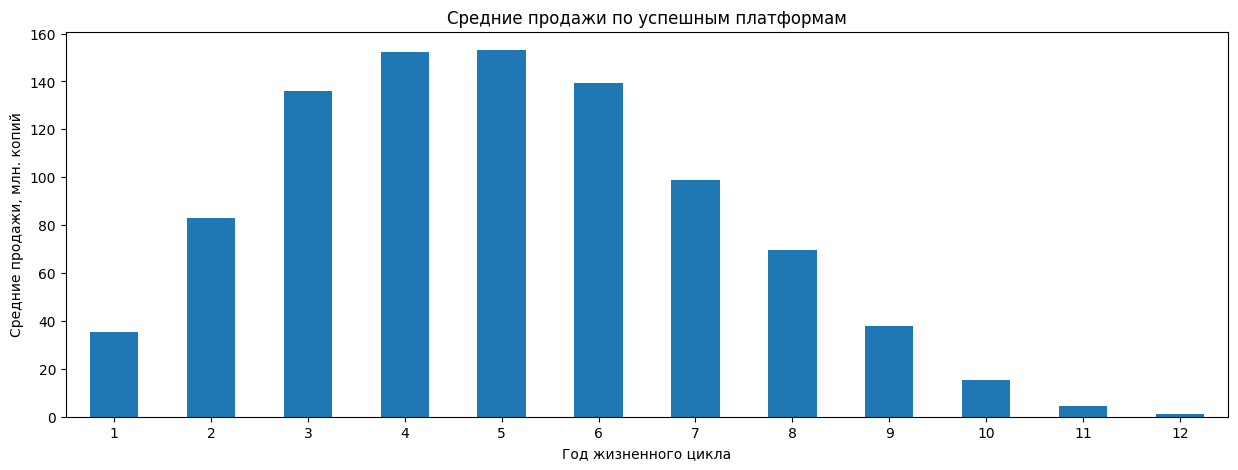

In [26]:
_ = top_platform_life.mean(axis=1).plot(
    kind="bar",
    figsize=(15, 5),
    title="Средние продажи по успешным платформам",
    xlabel="Год жизненного цикла",
    ylabel="Средние продажи, млн. копий",
    rot=0,
)

Можно сказать, что успешные платформы "живут" около 10-11 лет, а наибольшие продажи приходятся на 3-6 года их существования.

Посмотрим также на "середнячков".

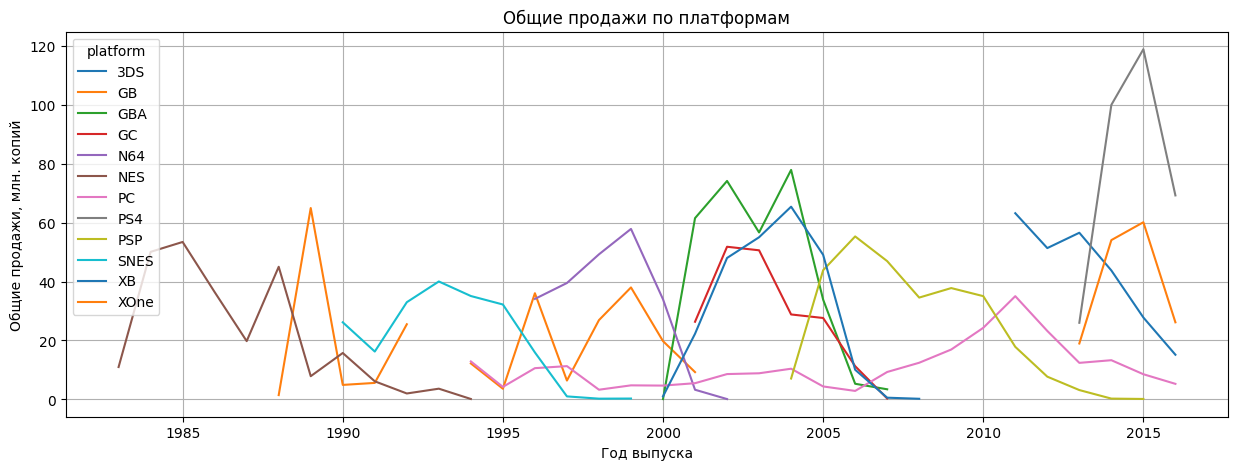

In [27]:
med_platforms = platform_agg["sales"].sort_values(ascending=False)["PS4":"XOne"].index
_ = (
    df.query("platform in @med_platforms")
    .pivot_table(
        index="year_of_release",
        columns="platform",
        values="total_sales",
        aggfunc="sum",
    )
    .plot(
        kind="line",
        figsize=(15, 5),
        title="Общие продажи по платформам",
        xlabel="Год выпуска",
        ylabel="Общие продажи, млн. копий",
        grid=True,
    )
)

Исключим всё ещё живые на 2016 год платформы, перестроим по годам жизни и усредним.

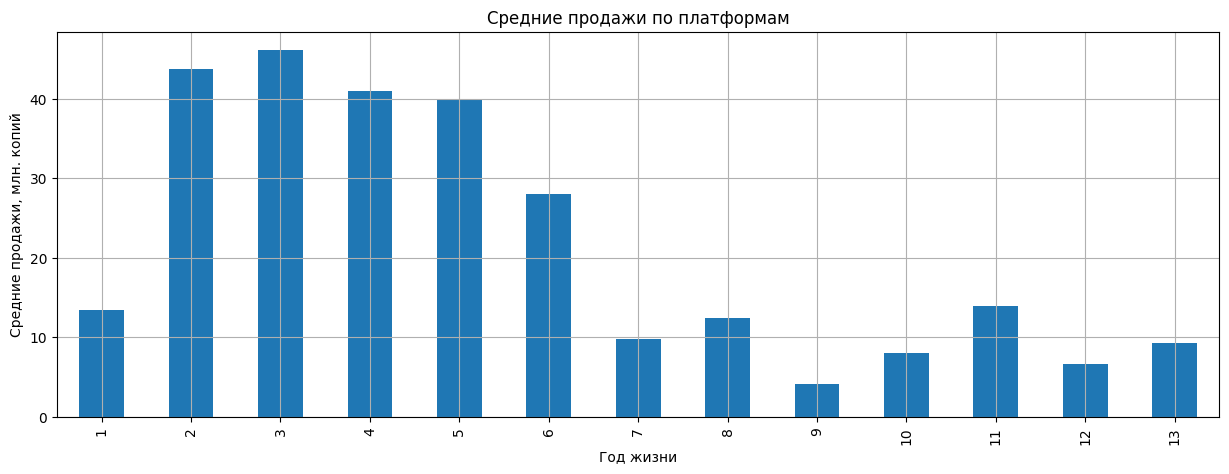

In [28]:
med_platforms = platform_agg["sales"].sort_values(ascending=False)["PS4":"XOne"]
med_platforms = med_platforms.drop(
    [
        "PS4",
        "XOne",
        "PC",
        "3DS",
    ]
)

med_platform_life = (
    df.query("platform in @med_platforms.index")
    .pivot_table(
        index="year_of_release",
        columns="platform",
        values="total_sales",
        aggfunc="sum",
    )
    .apply(lambda x: x.dropna(ignore_index=True))
)

med_platform_life.index = med_platform_life.index + 1

_ = med_platform_life.mean(axis=1).plot(
    kind="bar",
    figsize=(15, 5),
    title="Средние продажи по платформам",
    xlabel="Год жизни",
    ylabel="Средние продажи, млн. копий",
    grid=True,
)

"Умеренно успешные" платформы более разнородны, поэтому их усреднённое распределение продаж не такое "красивое", тем не менее можно сказать, что основные продажи для этих платформа приходятся на 2-6 года их жизни, что довольно близко к максимуму продаж лидеров. Время их жизни варьируется от 6 до 13 лет.

Стоит также отметить, что платформа персональных компьютеров (PC) явно выделяется из общего тренда: у неё нет какого-то фиксированного времени жизни, так как PC могут непрерывно обновляются. Поэтому при формулировке общих закономерностей эту платформу будем рассматривать отдельно.

В целом можно сказать, что при прогнозировании продаж вполне хватит данных за послдение 8-10 лет. Эти данные позволят оценить на каком этапе жизненного цикла находятся платформы, предствленные на рынке в данный конкретный момент времени, на основании чего можно строить прогнозы продаж на следующий год.

In [29]:
main_data = df.query("year_of_release >= 2012")
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2885 entries, 0 to 16426
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   Int64  
 3   na_sales         2885 non-null   float64
 4   eu_sales         2885 non-null   float64
 5   jp_sales         2885 non-null   float64
 6   other_sales      2885 non-null   float64
 7   total_sales      2885 non-null   float64
 8   genre            2885 non-null   object 
 9   critic_score     1311 non-null   Int64  
 10  user_score       1530 non-null   Int64  
 11  rating           2885 non-null   object 
dtypes: Int64(3), float64(5), object(4)
memory usage: 301.5+ KB


<a class="ancor" id="15-bullet"></a>
### Выбор прибыльных платформ

Посмотрим на всё ещё живые в 2016 платформы.

Нам известно, что данные за 2016 год неполные, поэтому не будем на них особо полагаться. Посмотрим распределение продаж по платформам, для которых выходили игры в 2015 и 2016 году.

Кроме того, для удобства составим сводную таблицу общих продаж и "года жизни" платформа в 2015 году. 

,sales_2015,year_of_life
platform,,
PS4,118.90,3
XOne,60.14,3
3DS,27.78,5
PS3,16.82,10
WiiU,16.35,4
X360,11.96,11
PC,8.52,31
PSV,6.25,5
Wii,1.14,10


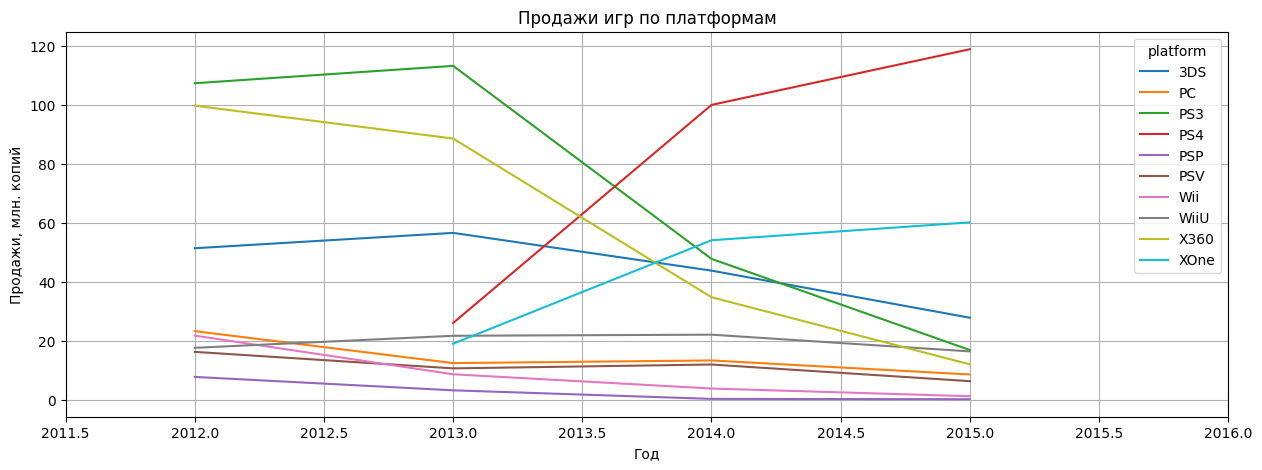

In [30]:
alive_platofrms = platform_agg.query("last_observed > 2014")
main_data = main_data.query("platform in @alive_platofrms.index")

_ = (
    main_data.pivot_table(
        index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
    )
    .iloc[:-1, :]
    .plot(
        kind="line",
        figsize=(15, 5),
        xlim=(2011.5, 2016),
        title="Продажи игр по платформам",
        xlabel="Год",
        ylabel="Продажи, млн. копий",
        grid=True,
        legend=True,
    )
)

pd.concat(
    [
        main_data.query("year_of_release == 2015")
        .groupby("platform")
        .agg(sales_2015=("total_sales", "sum"))
        .round(2),
        (platform_agg["appeared"].transform(lambda x: 2016 - x).rename("year_of_life")),
    ],
    axis=1,
).sort_values("sales_2015", ascending=False)

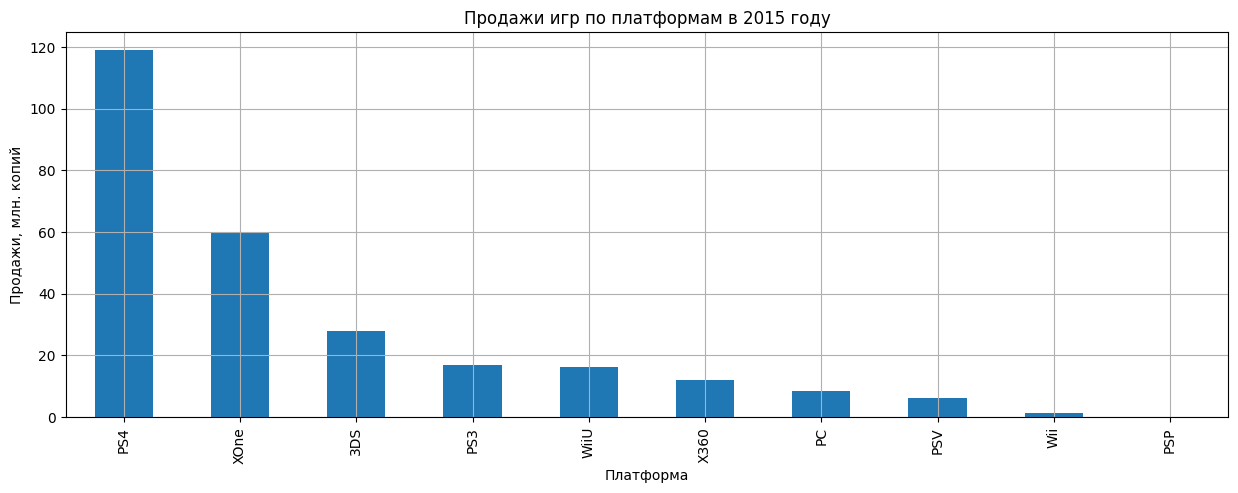

In [31]:
main_data.query("year_of_release == 2015").groupby("platform")[
    "total_sales"
].sum().sort_values(ascending=False).plot(
    kind="bar",
    figsize=(15, 5),
    title="Продажи игр по платформам в 2015 году",
    xlabel="Платформа",
    ylabel="Продажи, млн. копий",
    grid=True,
    legend=False,
)

perspective_plaforms = ["PS4", "XOne", "PC", "3DS", "WiiU"]

Видны 2 явных лидера, которые, кроме того, находятся в начале своего жизненного цикла и продажи игр для этих платформ врятли будут снижаться в ближайшие 2 года.

С довольно сильным отставанием, но всё же выделяясь на фоне остальных, на 3 месте идёт 3DS, эта платформа находится на 5 году своего сущестовавния и можно ожидать снижения продаж игр для неё в ближайшие 2 года примерно на 30-40%.

Также можно отметить WiiU, находящуюся на 4 году существования и "вечную" PC, для обеих платформ можно ожидать примерного сохранения показателей продажа на горизонте пары лет.

Оставшниеся платформы или находятся в конце своего жизненного пути или в его середине, обладая при этом низкими абсолютными продажами, поэтому их вкладом на горизонте следующих двух лет можно пренебречь.

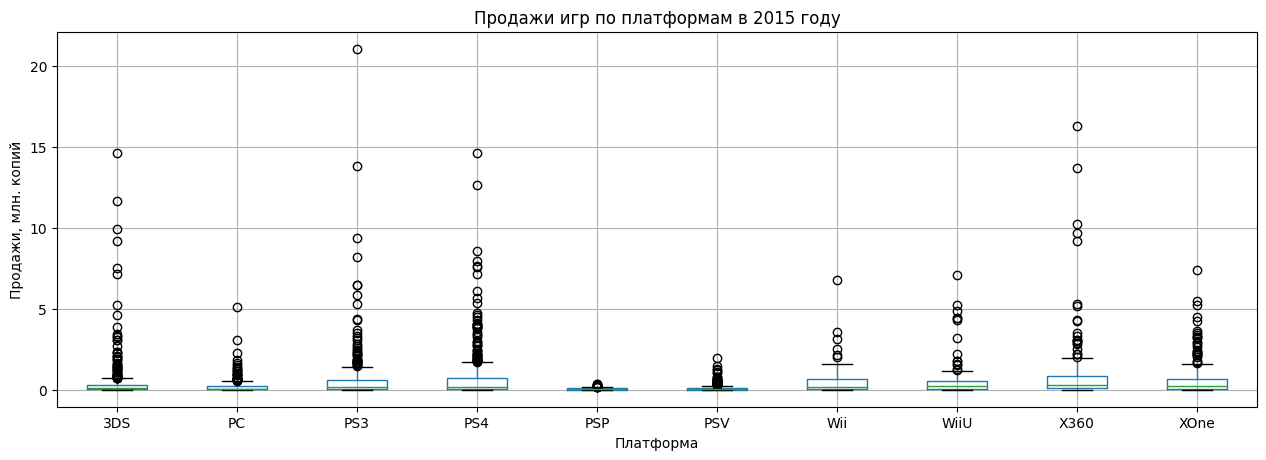

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
main_data.boxplot(
    column="total_sales",
    by="platform",
    ax=ax,
    grid=True,
    rot=0,
    xlabel="Платформа",
    ylabel="Продажи, млн. копий",
)
ax.set_title("Продажи игр по платформам в 2015 году")
_ = fig.suptitle("")

В распределения числа продаж наблюдаются очень сильные выбросы, которые делают нечитаемыми центральные значения, построим еще одну версию боксплота без выбросов

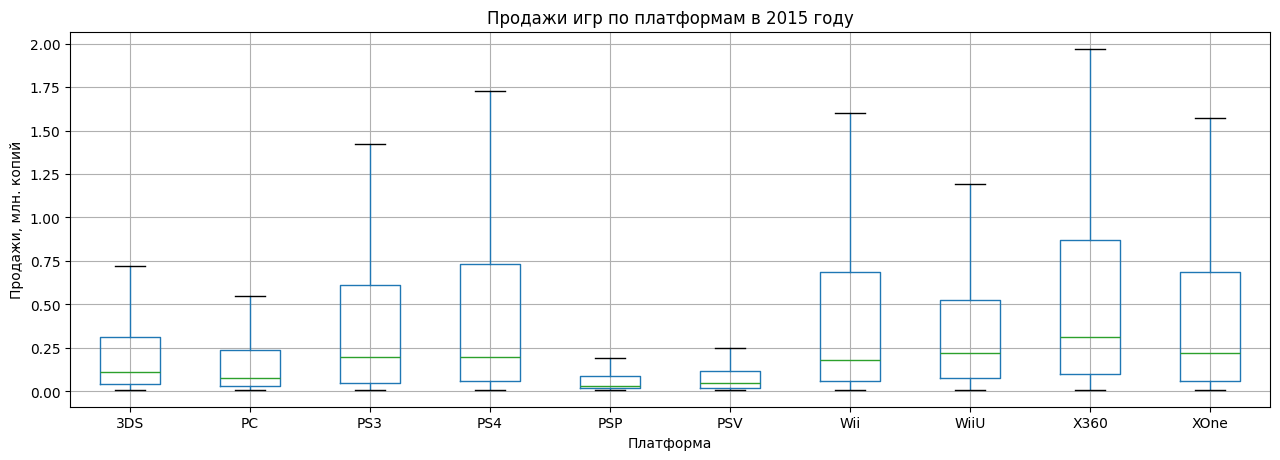

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
main_data.boxplot(
    column="total_sales",
    by="platform",
    ax=ax,
    grid=True,
    rot=0,
    xlabel="Платформа",
    ylabel="Продажи, млн. копий",
    showfliers=False,
)
ax.set_title("Продажи игр по платформам в 2015 году")
_ = fig.suptitle("")

А также посмотрим на численные значения

In [34]:
main_data.groupby("platform").agg(
    q1=("total_sales", lambda x: round(x.quantile(0.25), 2)),
    median=("total_sales", lambda x: round(x.median(), 2)),
    q3=("total_sales", lambda x: round(x.quantile(0.75), 2)),
).sort_values("median", ascending=False)

,q1,median,q3
platform,,,
X360,0.10,0.31,0.87
WiiU,0.08,0.22,0.52
XOne,0.06,0.22,0.68
PS3,0.05,0.20,0.61
PS4,0.06,0.20,0.73
Wii,0.06,0.18,0.69
3DS,0.04,0.11,0.31
PC,0.03,0.08,0.24
PSV,0.02,0.05,0.12


* В целом наблюдается общая тенденция увеличения межквартильного расстояния при увеличении медианного значения.
* Для большинства платформ есть как провальные игры, так и хиты.
* Платформа PSV является самой непопулярной, у неё минимальное медианное значение продаж и практически нет сильных хитов.

<a class="ancor" id="16-bullet"></a>
### Влияние отзывов

Посмотрим как отзывы пользователей и критиков влияют на продажи.

Начнём с самой популярной платформы PS4.

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


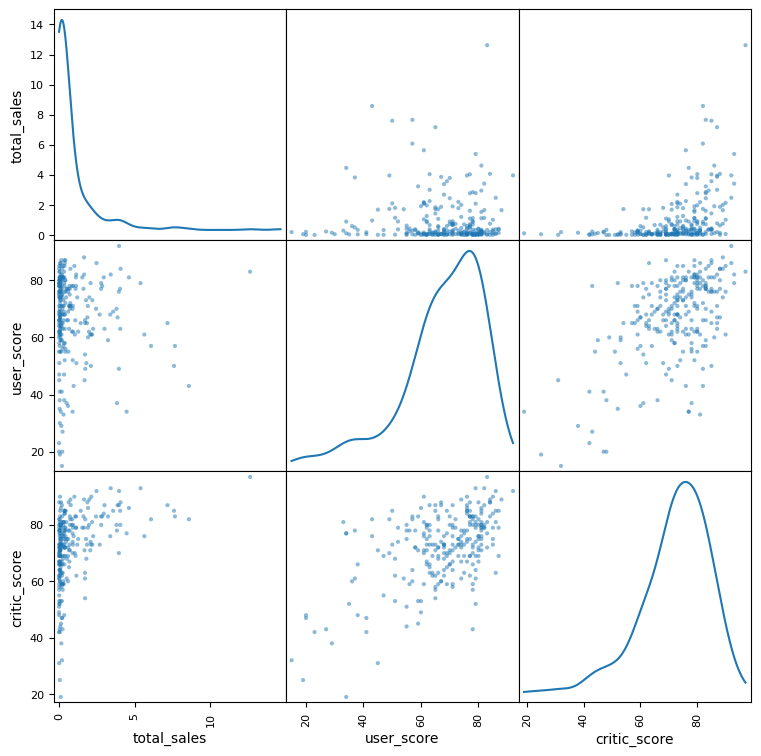

In [35]:
ps4 = main_data.query("platform == 'PS4'")[
    ["total_sales", "user_score", "critic_score"]
]
pd.plotting.scatter_matrix(
    ps4,
    figsize=(9, 9),
    alpha=0.5,
    diagonal="kde",
)
ps4.corr()

Как видно из данных, между оценкой игроков и продажами нет вообще никакой корреляции, а между оченками критиков и продажами есть слабая положительная корреляция (0.4).

Посмотрим, справедлив ли такой вывод для всех платформ или PS4 в этом уникальна.

In [36]:
def trunc(data: pd.DataFrame, col: str, trunc_factor: float = 0.1) -> pd.DataFrame:
    """
    Обрезает данные по заданному количеству квантилей.

    Parameters
    ----------
    data : pd.DataFrame
        Датафрейм, который нужно обрезать.
        col : str
        Название колонки, по которой нужно обрезать данные.
        trunc_factor : float
        Доля данных, которую суммарно нужно обрезать.
    """
    lower_val = data[col].quantile(trunc_factor / 2)
    upper_val = data[col].quantile(1 - trunc_factor / 2)
    return data[(data[col] >= lower_val) & (data[col] <= upper_val)]


def plot_sales_corr(
    data: pd.DataFrame,
    col: str,
    trunc_factor: float = 0.1,
):
    """
    Считает корреляции и строит графики зависимости продаж от заданной колонки.

    Parameters
    ----------
    data : pd.DataFrame
        Датафрейм, по которому нужно построить графики.
    col : str
        Название колонки, по которой нужно считать корреляции и строить графики.
    trunc_factor : float
        Доля данных, которую суммарно нужно обрезать.
    """

    ncols = 4
    nrows = int(np.ceil(len(data["platform"].unique()) / ncols))
    scale = 3
    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(scale * ncols, scale * nrows),
        sharex=True,
    )
    flat_axes = axes.flatten()

    for i, platf in enumerate(data["platform"].unique()):
        platform_data = data.query("platform == @platf")
        platform_data = trunc(platform_data, col, trunc_factor)
        platform_data = trunc(platform_data, "total_sales", trunc_factor)
        platform_data.plot(
            kind="scatter",
            x=col,
            y="total_sales",
            ax=flat_axes[i],
            title=f'{platf}. corr = {round(platform_data["total_sales"].corr(platform_data[col]), 2)}',
            grid=True,
            alpha=0.5,
            ylabel="Продажи, млн. копий",
        )
    fig.tight_layout()
    return fig, flat_axes

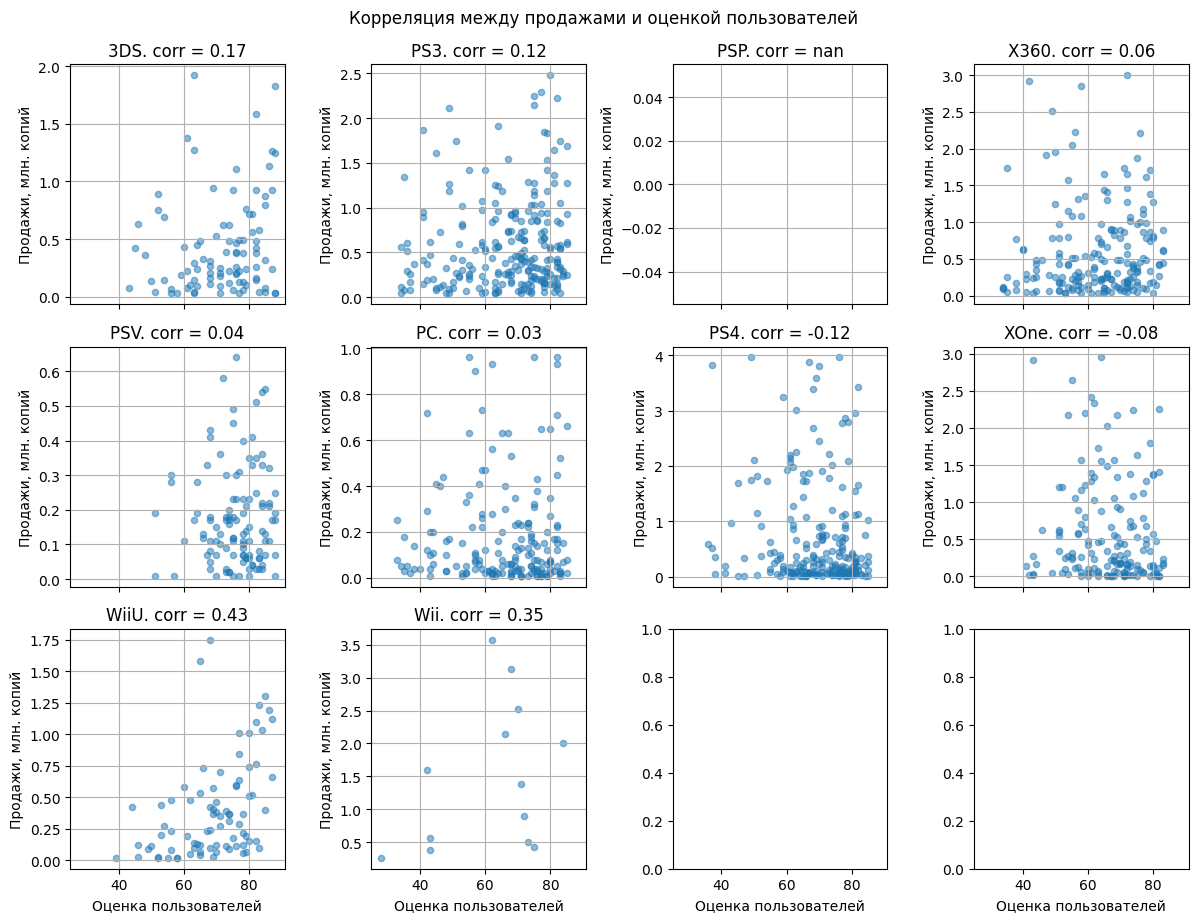

In [37]:
fig, axes = plot_sales_corr(
    data=main_data,
    col="user_score",
)
for ax in axes:
    ax.set_xlabel("Оценка пользователей")
_ = fig.suptitle("Корреляция между продажами и оценкой пользователей", y=1.02)

/Users/antonpopov/python_projects/yandex_ds_8_mo/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/antonpopov/python_projects/yandex_ds_8_mo/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/antonpopov/python_projects/yandex_ds_8_mo/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/antonpopov/python_projects/yandex_ds_8_mo/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/antonpopov/python_projects/yandex_ds_8_mo/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in d

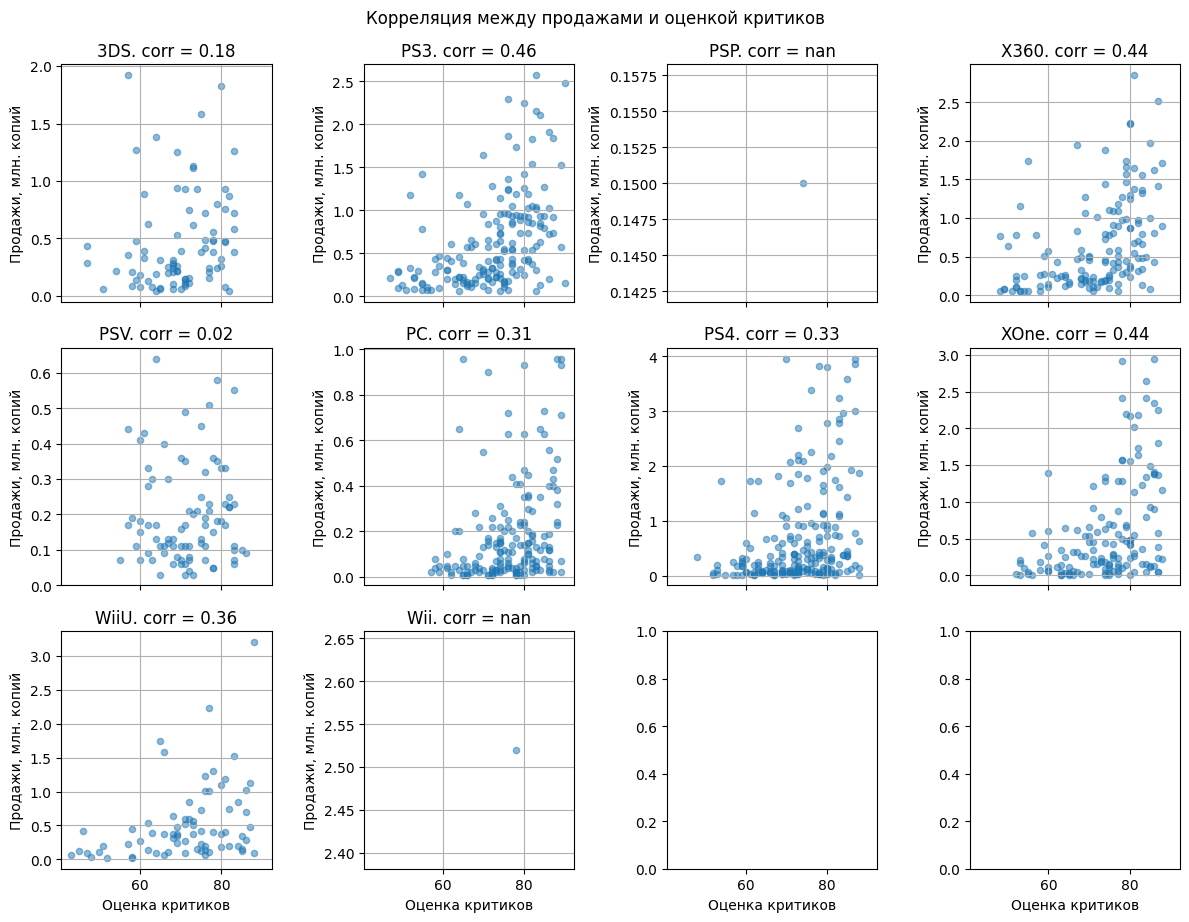

In [38]:
fig, axes = plot_sales_corr(data=main_data, col="critic_score")
for ax in axes:
    ax.set_xlabel("Оценка критиков")
_ = fig.suptitle("Корреляция между продажами и оценкой критиков", y=1.02)

Судя по данным, отсутствие корреляции между оценками игроков и продажами типично практически для всех платформ (слабая корреляция в 0.4 наблюдается только для WiiU).
Наличие слабой корреляции (0.25-0.5) между оценками критиков и продажами также типично для большинства платформ.

<a class="ancor" id="17-bullet"></a>
### Игровые жанры

Посмотрим на распределение общих продаж игр по жанрам.

,total_sales,median_sales,max_sales,count,sales_per_game
genre,,,,,
Shooter,304.73,0.44,62.05,235,1.30
Sports,180.96,0.24,33.00,265,0.68
Platform,60.31,0.21,24.89,83,0.73
Racing,53.50,0.14,17.75,115,0.47
Role-Playing,183.72,0.14,45.73,368,0.50
Fighting,44.49,0.13,17.96,109,0.41
Action,439.30,0.12,64.55,1016,0.43
Misc,84.56,0.12,29.95,190,0.45
Simulation,34.91,0.12,21.91,79,0.44


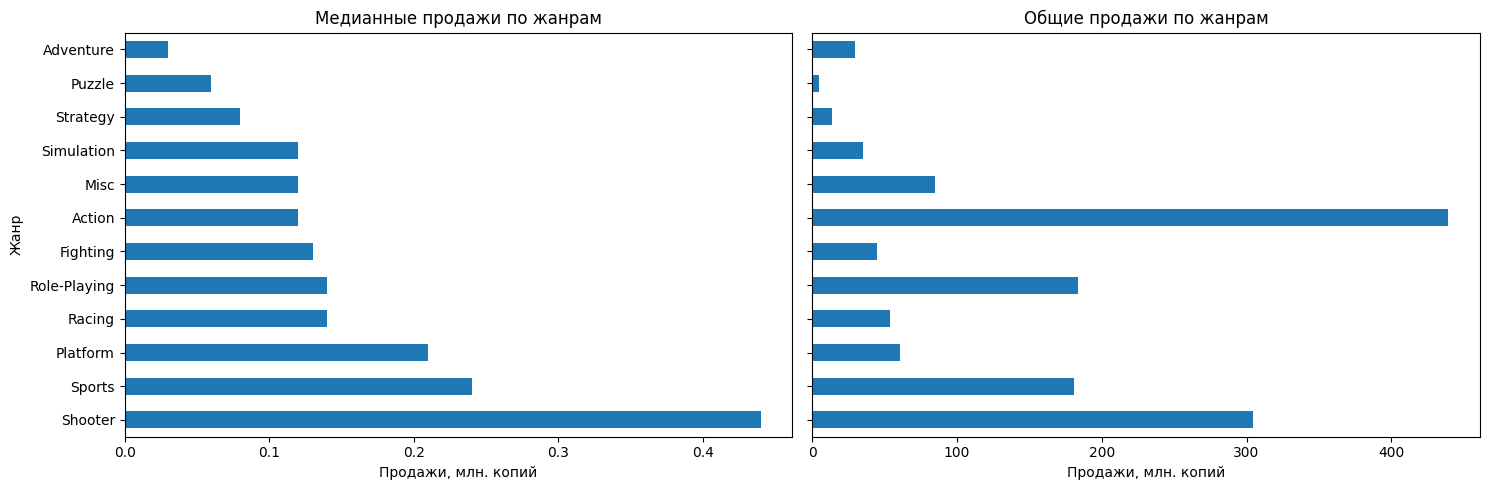

In [39]:
genre_sales = (
    main_data.groupby("genre")
    .agg(
        total_sales=("total_sales", "sum"),
        median_sales=("total_sales", lambda x: round(x.median(), 2)),
        max_sales=("total_sales", lambda x: x.nlargest(5).sum()),
        count=("name", "count"),
    )
    .assign(sales_per_game=lambda x: round(x["total_sales"] / x["count"], 2))
    .sort_values("median_sales", ascending=False)
)

fig, ax = plt.subplots(ncols=2, figsize=(15, 10), sharey=True)
genre_sales.plot(
    kind="barh",
    y="median_sales",
    ax=ax[0],
    figsize=(15, 5),
    title="Медианные продажи по жанрам",
    ylabel="Жанр",
    xlabel="Продажи, млн. копий",
    legend=False,
)
genre_sales.plot(
    kind="barh",
    y="total_sales",
    ax=ax[1],
    figsize=(15, 5),
    title="Общие продажи по жанрам",
    ylabel="Жанр",
    xlabel="Продажи, млн. копий",
    legend=False,
)
fig.tight_layout()
genre_sales

Лидером по медианным прадажам являются шутеры, спортивные игры и платформеры. Интересно, что при этом лидером по абсолютным продажам явлются экшны, они же являются самым популярным жанром у производителей игр, а вот медианные продажи для таких игр находятся всего лишь на 7 месте (во второй половине списка).

Явным аутсайдером по медианным продажам являются приключеченские игры и пазлы, последние являются также самым непопулярным жанром в абсолютном выражении как у производителей, так и у игроков (всего 24 игры и 200 тыс. проданных копий).

<a class="ancor" id="18-bullet"></a>
### Выводы

Был проведён исследовательский анализ данных:
* Анализ выпуска игр по годам:
  * Активный рост числа выпускаемых игр начался примерно с 1994 года и продолжался до 2008-2009 годов.
    Затем за 5 лет произошло резкое (более, чем в 2 раза) сокращение выпуска новых игр до примерно 600 в год и с 2012 года это значение оставаётся примерно постоянным.
* Анализ распределения продаж по платформам:
  * По общим продажам явно выделяются 6 платформ: PS/PS2/PS3, X360, Wii и DS, за ними идёт группа из 12 платформ с общими       продажами около 200-300 млн. копий, все остальные платформы имеют незначительные продажи.
  * Успешные платформы "живут" около 10-11 лет, а наибольшие продажи приходятся на 3-6 года их существования.
  * "Умеренно успешные" платформы более разнородны, тем не менее можно сказать, что основные продажи для этих платформ приходятся на 2-6 года их жизни, что довольно близко к максимуму продаж лидеров. Время их жизни варьируется от 6 до 13 лет
  * Платформа персональных компьютеров (PC) явно выделяется из общего тренда: у неё нет какого-то фиксированного времени жизни, так как PC могут непрерывно обновляются. Поэтому при формулировке общих закономерностей эту платформу лучше рассматривать отдельно.
* Определение актуального периода:
  * При прогнозировании продаж используем данные за послдение 4 года лет.
* Прибыльные платформы: PS4, XOne, PC, 3DS, WiiU 
  * В этом списке 2 явных лидера (PS4 и XOne), которые, находятся в начале своего жизненного цикла и продажи игр для этих платформ врятли будут снижаться в ближайшие 2 года.
    С довольно сильным отставанием, но всё же выделяясь на фоне остальных, на 3 месте идёт 3DS, эта платформа находится на 5 году своего сущестовавния и можно ожидать снижения продаж игр для неё в ближайшие 2 года примерно на 30-40%.
    Также выделены WiiU, находящуяся на 4 году существования и "вечная" PC, для обеих платформ можно ожидать примерного сохранения показателей продажа на горизонте пары лет.
    Оставшниеся платформы или находятся в конце своего жизненного пути или в его середине, обладая при этом низкими абсолютными продажами, поэтому их вкладом на горизонте следующих двух лет можно пренебречь.
  * В целом наблюдается общая тенденция увеличения межквартильного расстояния при увеличении медианного значения глобальных продаж для всех платформ.
  * Для большинства платформ есть как провальные игры, так и хиты.
  * Платформа PSV является самой непопулярной, у неё минимальное медианное значение продаж и практически нет сильных хитов.
* Изучение влияния отзывов на продажи:
  * Отсутствие корреляции между оценками игроков и продажами типично практически для всех платформ (слабая корреляция в 0.4 наблюдается только для WiiU).
  * Наличие слабой корреляции (0.25-0.5) между оценками критиков и продажами также типично для большинства платформ.
* Изучение жанров:
  * Лидером по медианным прадажам являются шутеры, спортивные игры и платформеры. Интересно, что при этом лидером по абсолютным продажам явлются экшны, они же являются самым популярным жанром у производителей игр, а вот медианные продажи для таких игр находятся всего лишь на 7 месте (во второй половине списка).
  * Явным аутсайдером по медианным продажам являются приключеченские игры и пазлы, последние являются также самым непопулярным жанром в абсолютном выражении как у производителей, так и у игроков (всего 24 игры и 200 тыс. проданных копий).

[Оглавление](#0-bullet)

<a class="ancor" id="19-bullet"></a>
## Портрет пользователя по регионам (NA, EU, JP)

<a class="ancor" id="20-bullet"></a>
### Топ популярных платформ

Создадим функцию для определения топовых категорий

In [40]:
def region_top(data: pd.DataFrame, category: str, ntop: int = 5) -> pd.DataFrame:
    """
    Функция для получения топа платформ по продажам в каждом регионе

    Parameters
    ----------
    data : pd.DataFrame
        Датафрейм с данными о продажах игр
    category : str
        Категория, по которой нужно получить топ
    ntop : int
        Количество топовых категорий
    """

    return pd.concat(
        (
            data.groupby(category)[region]  # группируем по категориям
            .sum()  # суммируем продажи по регионам
            .pipe(
                lambda x: round(x.nlargest(ntop) / x.sum(), 2)
            )  # находим топ по продажам и вычисляем долю
            .rename_axis(
                "_".join([region[:2], category])
            )  # присваиваем понятные нахвания
            .reset_index()  # теперь для каждого региона у нас есть датафрейм с названиями и долями топовых категорий
            for region in ["eu_sales", "jp_sales", "na_sales"]  # итерирурем по регионам
        ),
        axis=1,  # объединяем в единый датафрейм
    )

А также функцию для построения графиков этих топовых категорий.

In [41]:
def plot_region_top(data: pd.DataFrame, category: str, ntop: int = 5) -> None:
    """
    Функция для построения графиков топ-5 платформ по продажам в каждом регионе.

    Parameters
    ----------
    data : pd.DataFrame
        Датафрейм с данными о продажах игр
    category : str
        Категория, по которой нужно получить топ
    ntop : int
        Количество топовых категорий
    """

    region_top_df = region_top(data, category, ntop)
    region_top_df.rename(
        columns={
            "eu_sales": "Европа",
            "jp_sales": "Япония",
            "na_sales": "Северная Америка",
        },
        inplace=True,
    )
    fig, axs = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)
    for i in range(3):
        region_top_df.plot(
            kind="bar",
            x=region_top_df.columns[2 * i],
            y=region_top_df.columns[2 * i + 1],
            ax=axs[i],
            legend=False,
            rot=45,
        )
        axs[i].set_xlabel(region_top_df.columns[2 * i + 1])
        axs[i].set_ylabel("Доля от общего объема продаж")
    fig.suptitle(f"Топ-{ntop} {category} по регионам")

Посмотрим популярность платформ.

,eu_platform,eu_sales,jp_platform,jp_sales,na_platform,na_sales
0,PS4,0.28,3DS,0.46,X360,0.24
1,PS3,0.21,PS3,0.19,PS4,0.19
2,X360,0.15,PSV,0.11,PS3,0.18
3,XOne,0.10,PS4,0.08,XOne,0.16
4,3DS,0.08,WiiU,0.07,3DS,0.09


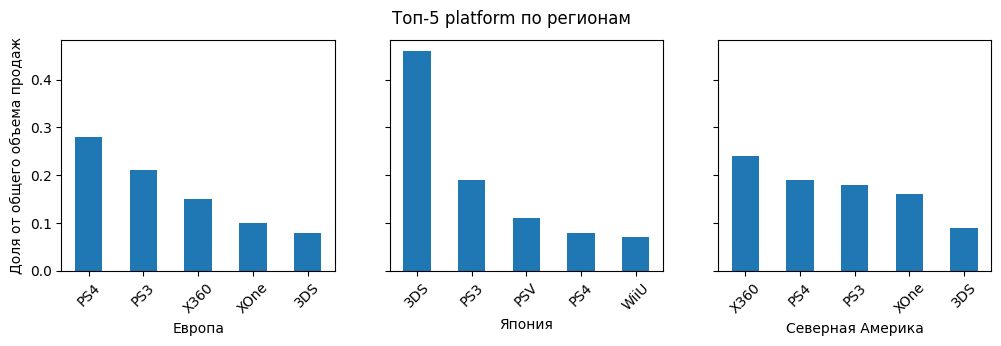

In [42]:
plot_region_top(main_data, "platform")
region_top(main_data, "platform")

Топ-4 в Европе и Северной Америке похож и представлен стандартными домашними консолями различных поколений. В Северной Америке продажи для всех платформ из топ-4 близки. В Европе платформы от Sony более популярны аналогов от Miscrosoft.

Интересно, что Японский рынок довольно сильно отличается. Здесь явным лидером является 3DS, весь топ представлен отечественными японскими консолями, причем большую часть (в том числе первое место) принадлежит мобильным платформам.

<a class="ancor" id="21-bullet"></a>
### Топ популярных жанров

,eu_genre,eu_sales,jp_genre,jp_sales,na_genre,na_sales
0,Action,0.32,Role-Playing,0.33,Action,0.30
1,Shooter,0.23,Action,0.28,Shooter,0.25
2,Sports,0.14,Misc,0.07,Sports,0.14
3,Role-Playing,0.09,Simulation,0.06,Role-Playing,0.10
4,Racing,0.05,Fighting,0.05,Misc,0.07


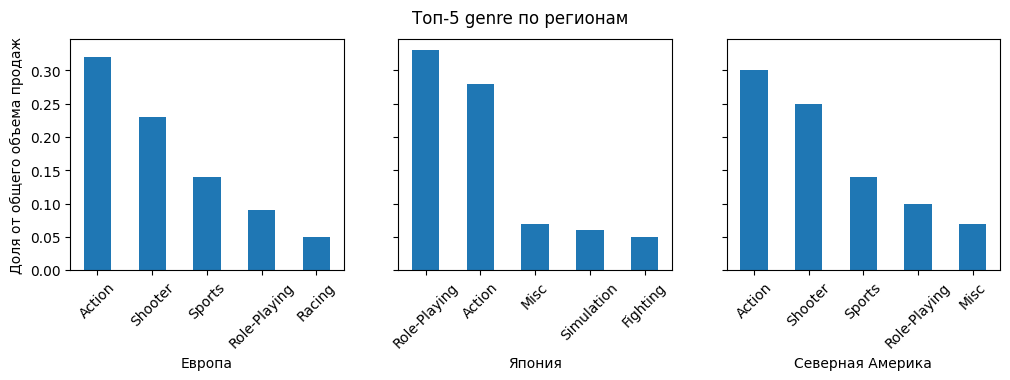

In [43]:
plot_region_top(main_data, "genre")
region_top(main_data, "genre")

Распределение популярности жанров похоже на распределения платформ. В Европе и Северной Америке топ-5 выглядит практически идентично и по составу и по распределнию мест, единственное различие в последнем 5 месте. Сам же тоg-3 выглядит следующим образом: экшны, шутеры, спортивные игры.

В японии ситуация довольно сильно отличается. Здесь видны 2 явных лидера: РПГ и экшны, что должно быть связано с популярностью мобильных консолей.

<a class="ancor" id="22-bullet"></a>
### Влияние ESRB

,eu_rating,eu_sales,jp_rating,jp_sales,na_rating,na_sales
0,M,0.39,RP,0.56,M,0.39
1,E,0.22,E,0.15,E,0.19
2,RP,0.18,T,0.14,RP,0.17
3,E10+,0.11,M,0.11,E10+,0.13
4,T,0.11,E10+,0.04,T,0.11


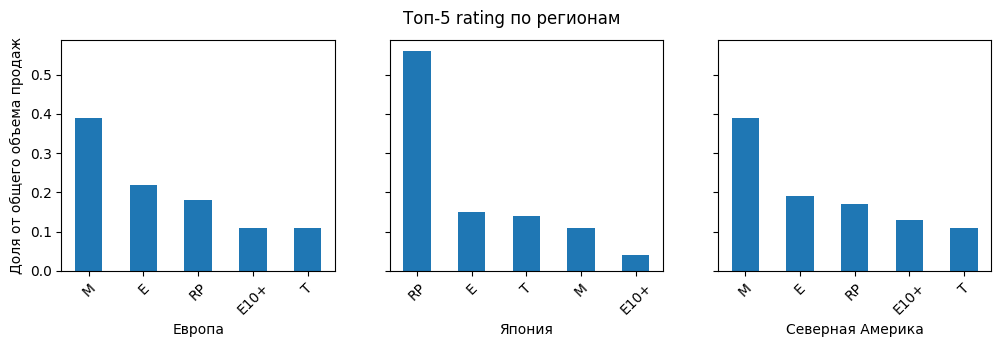

In [44]:
plot_region_top(main_data, "rating")
region_top(main_data, "rating")

В отношении рейтинга ситуация опять повторяется. В Европе и Северной Америке примерно есть явный лидер (М), которому принадлежит около 40% рынка.

Япония интересна тем, что там почти у половины игр вообще нет рейтинга, что возможно связано с тем, что это локальные игры для японского рынка, которые не выходили на североамериканский рынок.

<a class="ancor" id="23-bullet"></a>
### Выводы

Портреты пользователей из Европы и Северной Америки довольно похожи. Это люди, предпочитающие играть дома на стационарной консоли в основном в экшны, шутеры или спортивные игры категории М.

Средний пользователь из Японии выглядит по-другому: это человек, предпочитающий мобильную консоль, на которой он играет в рпг или экшн, выпущенный локально для японского рынка.

[Оглавление](#0-bullet)

<a class="ancor" id="24-bullet"></a>
## Проверка гипотез

<a class="ancor" id="25-bullet"></a>
### Равенство рейтингов на платформах Xbox One и PC 

Платформа Xbox One появилась в 2013 году поэтому будем сравнивать данные за 2013-2016 года.

In [45]:
xbox_rating = main_data.query('platform == "XOne"')["user_score"].dropna()
print(f"Xbox One: количество оценок {xbox_rating.count()}.")
pc_rating = main_data.query('platform == "PC" and year_of_release > 2012')[
    "user_score"
].dropna()
print(f"PC: количество оценок {pc_rating.count()}.")

Xbox One: количество оценок 182.
PC: количество оценок 155.


Посмотрим как распределены оценки.

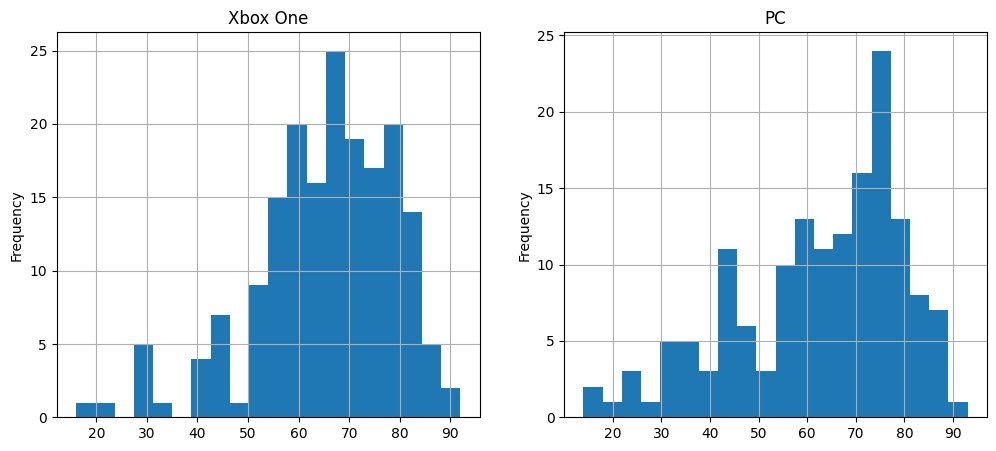

In [46]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
xbox_rating.plot(
    kind="hist",
    bins=20,
    ax=axs[0],
    title="Xbox One",
    grid=True,
    legend=False,
)
_ = pc_rating.plot(
    kind="hist",
    bins=20,
    ax=axs[1],
    title="PC",
    grid=True,
    legend=False,
)

In [47]:
alpha = 0.01

for name, data in zip(["Xbox One", "PC"], [xbox_rating, pc_rating]):
    p_val = stats.shapiro(data).pvalue
    if p_val < alpha:
        print(
            f"Распределение {name} значимо отличается от нормального (p-value = {p_val:.1e})"
        )
    else:
        print(
            f"Распределение {name} НЕзначимо отличается от нормального (p-value = {p_val:.1e})"
        )

Распределение Xbox One значимо отличается от нормального (p-value = 1.5e-05)
Распределение PC значимо отличается от нормального (p-value = 5.0e-06)


В распределениях (особенно для PC) наблюдается ассиметрия. Воспользуемся критерием Манна-Уитни для сравнения медианных значений.

Сформулируем **нуль-гипотезу**: Медианное значение пользовательского рейтинга игр на платформе Xbox One равно медианному значению пользовательского рейтинга игр на платформе PC.

**Альтернативная гипотеза**: Медианное значение пользовательского рейтинга игр для платформ Xbox One и PC различаются.

Зададим **уровень статистической значимости** в **5%**.

Для оценки будем пользоваться методом mannwhitneyu c двусторонней альтернативной гипотезой.

In [48]:
alpha = 0.05
_, p_val = stats.mannwhitneyu(xbox_rating, pc_rating)
if p_val < alpha:
    print(
        f"p-значение = {p_val:.3f}. Отвергаем нулевую гипотезу. Медианные пользовательские оценки Xbox One и PC различаются."
    )
else:
    print(
        f"p-значение = {p_val:.3f}. Данные не позволяют отвергнуть нулевую гипотезу о равенстве медианных пользовательских оценок Xbox One и PC."
    )

p-значение = 0.501. Данные не позволяют отвергнуть нулевую гипотезу о равенстве медианных пользовательских оценок Xbox One и PC.


<a class="ancor" id="26-bullet"></a>
### Различие рейтингов жанров Action и Sports

In [49]:
action_rating = main_data.query('genre == "Action"')["user_score"].dropna()
print(f"Экшн: количество оценок {action_rating.count()}.")
sports_rating = main_data.query('genre == "Sports"')["user_score"].dropna()
print(f"Спорт: количество оценок {sports_rating.count()}.")

Экшн: количество оценок 521.
Спорт: количество оценок 194.


Посмотрим как распределены оценки

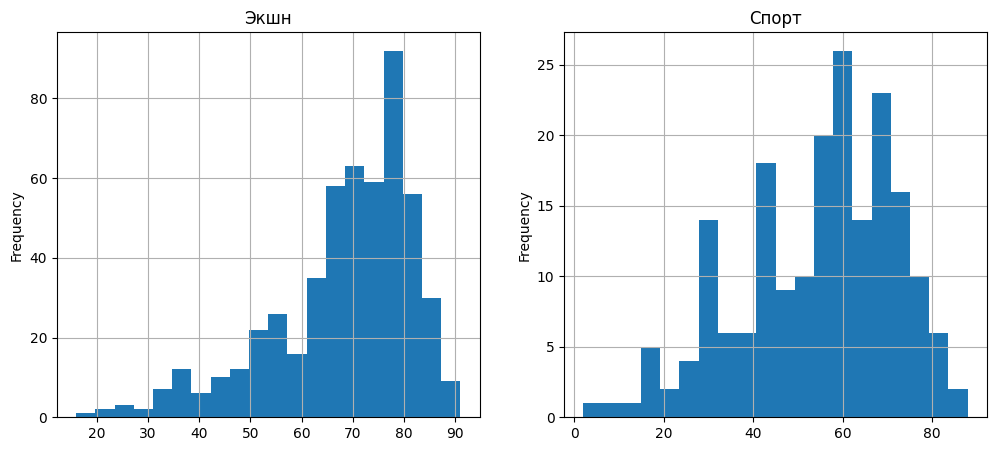

In [50]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
action_rating.plot(
    kind="hist",
    bins=20,
    ax=axs[0],
    title="Экшн",
    grid=True,
    legend=False,
)
_ = sports_rating.plot(
    kind="hist",
    bins=20,
    ax=axs[1],
    title="Спорт",
    grid=True,
    legend=False,
)

In [51]:
alpha = 0.01

for name, data in zip(["экшн", "спорт"], [action_rating, sports_rating]):
    p_val = stats.shapiro(data).pvalue
    if p_val < alpha:
        print(
            f"Распределение рейтинга игр жанра {name} значимо отличается от нормального (p-value = {p_val:.1e})"
        )
    else:
        print(
            f"Распределение рейтинга игр жанра {name} НЕзначимо отличается от нормального (p-value = {p_val:.1e})"
        )

Распределение рейтинга игр жанра экшн значимо отличается от нормального (p-value = 8.2e-17)
Распределение рейтинга игр жанра спорт значимо отличается от нормального (p-value = 2.5e-04)


Распределения опять довольно ассиметричны и лучше в качестве центров распределний использовать медиану, а не среднее значение.
Используем критерий Манна-Уитни.

На первый взгляд кажется, что медиана у жанра экшн повыше. Посмотрим на значения и попробуем сформулировать более сильную альтернативную гипотезу.

In [52]:
print(f"Экшн: медиана {action_rating.median()}.")
print(f"Спорт: медиана {sports_rating.median()}.")

Экшн: медиана 71.0.
Спорт: медиана 57.5.


Сформулируем **нуль-гипотезу**: Медианное значение пользовательского рейтинга игр жанра экшн равно медианному значению пользовательского рейтинга игр жанра спорт.

**Альтернативная гипотеза**: Медианное значение пользовательского рейтинга игр для жанра экшн выше, чем для игр жанра спорт.

Зададим **уровень статистической значимости** в **5%**.

Для оценки будем пользоваться методом mannwhitneyu c одностронней альтернативной гипотезой.

In [53]:
alpha = 0.05
_, p_val = stats.mannwhitneyu(action_rating, sports_rating, alternative="greater")
if p_val < alpha:
    print(
        f"p-значение = {p_val:.1e}. Отвергаем нулевую гипотезу в пользу альтернативной: медиана пользовательских оценок игр жанров экшн выше, чем игр жанра спорт."
    )
else:
    print(
        f"p-значение = {p_val:.1e}. Данные не позволяют отвергнуть нулевую гипотезу о равенстве медианных пользовательских оценок игр жанров экшн и спорт."
    )

p-значение = 7.6e-24. Отвергаем нулевую гипотезу в пользу альтернативной: медиана пользовательских оценок игр жанров экшн выше, чем игр жанра спорт.


<a class="ancor" id="27-bullet"></a>
### Выводы

1. Данные не позволяют отвергнуть нулевую гипотезу о равенстве медианных пользовательских оценок Xbox One и PC.
2. Медиана пользовательских оценок игр жанров экшн выше, чем игр жанра спорт.

[Оглавление](#0-bullet)

<a class="ancor" id="28-bullet"></a>
## Общие выводы

1. **Предобработка данных**:
* Названия столбцов данных приведены к каноническому виду.
* Корректировка типов данных:
  * Год выпуска игры и оценка критиков приведены к целочисленному виду
  * Пользовательская оценка приведена к единой шкале с оценкой критиков, её тип также установлен целочисленным.
* Работа с пропусками:
  * Игры без названия, жанра и года выпуска удалены, так как их суммарное значение незначительно (271) и они равномерно распределены по платформам.
  * Пропуски в оценках не заполнялись.
  * Пропуски в рейтинге заменены категорией 'RP' (rating pending).
* Обработка аномальных значений
  * В пользовательских оценках значения 'tbd' заменены пропусками.
* Категоризация
  * В рейтинге ESRB рейтинг 'EC' заменён на рейтинг 'E' в соответствии с процедурой, проведенной самим ESRB. (как было сказано выше, пропускам присвоено значение 'RP')
  * Добавлен столбец с суммарными продажами - 'total_sales'
* Обнаружен один неявные дубликат. Для этого дубликата продажи просуммированы и дублирующее значение удалено.

2. **Исследовательский анализ данных**:
* Анализ выпуска игр по годам:
  * Активный рост числа выпускаемых игр начался примерно с 1994 года и продолжался до 2008-2009 годов.
    Затем за 5 лет произошло резкое (более, чем в 2 раза) сокращение выпуска новых игр до примерно 600 в год и с 2012 года это значение оставаётся примерно постоянным.
* Анализ распределения продаж по платформам:
  * По общим продажам явно выделяются 6 платформ: PS/PS2/PS3, X360, Wii и DS, за ними идёт группа из 12 платформ с общими продажами около 200-300 млн. копий, все остальные платформы имеют незначительные продажи.
  * Успешные платформы "живут" около 10-11 лет, а наибольшие продажи приходятся на 3-6 года их существования.
  * "Умеренно успешные" платформы более разнородны, тем не менее можно сказать, что основные продажи для этих платформ приходятся на 2-6 года их жизни, что довольно близко к максимуму продаж лидеров. Время их жизни варьируется от 6 до 13 лет
  * Платформа персональных компьютеров (PC) явно выделяется из общего тренда: у неё нет какого-то фиксированного времени жизни, так как PC могут непрерывно обновляются. Поэтому при формулировке общих закономерностей эту платформу лучше рассматривать отдельно.
* Определение актуального периода:
  * При прогнозировании продаж используем данные за послдение 4 года лет.
* Прибыльные платформы: PS4, XOne, PC, 3DS, WiiU 
  * В этом списке 2 явных лидера (PS4 и XOne), которые, находятся в начале своего жизненного цикла и продажи игр для этих платформ врятли будут снижаться в ближайшие 2 года.
    С довольно сильным отставанием, но всё же выделяясь на фоне остальных, на 3 месте идёт 3DS, эта платформа находится на 5 году своего сущестовавния и можно ожидать снижения продаж игр для неё в ближайшие 2 года примерно на 30-40%.
    Также выделены WiiU, находящуяся на 4 году существования и "вечная" PC, для обеих платформ можно ожидать примерного сохранения показателей продажа на горизонте пары лет.
    Оставшниеся платформы или находятся в конце своего жизненного пути или в его середине, обладая при этом низкими абсолютными продажами, поэтому их вкладом на горизонте следующих двух лет можно пренебречь.
  * В целом наблюдается общая тенденция увеличения межквартильного расстояния при увеличении медианного значения глобальных продаж для всех платформ.
  * Для большинства платформ есть как провальные игры, так и хиты.
  * Платформа PSV является самой непопулярной, у неё минимальное медианное значение продаж и практически нет сильных хитов.
* Изучение влияния отзывов на продажи:
  * Отсутствие корреляции между оценками игроков и продажами типично практически для всех платформ (слабая корреляция в 0.4 наблюдается только для WiiU).
  * Наличие слабой корреляции (0.25-0.5) между оценками критиков и продажами также типично для большинства платформ.
* Изучение жанров:
  * Лидером по медианным прадажам являются шутеры, спортивные игры и платформеры. Интересно, что при этом лидером по абсолютным продажам явлются экшны, они же являются самым популярным жанром у производителей игр, а вот медианные продажи для таких игр находятся всего лишь на 7 месте (во второй половине списка).
  * Явным аутсайдером по медианным продажам являются приключеченские игры и пазлы, последние являются также самым непопулярным жанром в абсолютном выражении как у производителей, так и у игроков (всего 24 игры и 200 тыс. проданных копий).

3. **Портреты пользователей из Европы и Северной Америки** довольно похожи. Это люди, предпочитающие играть дома на стационарной консоли в основном в экшны, шутеры или спортивные игры категории М.

    **Средний пользователь из Японии** выглядит по-другому: это человек, предпочитающий мобильную консоль, на которой он играет в рпг или экшн, выпущенный локально для японского рынка.

4. **Проверка статистических гипотез дала следующие результаты**
   * Данные не позволяют отвергнуть нулевую гипотезу о равенстве медианных пользовательских оценок Xbox One и PC.
   * Медиана пользовательских оценок игр жанров экшн выше, чем игр жанра спорт.